In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('image', cmap='gray')
from skimage import io, transform, color
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils
import os

In [4]:
dir_images = r'E:\Data\Unity\Minos\Fixation Training Images'
path_pos = r'E:\Data\Unity\Minos\Fixation Training Pos.bin'
print(dir_images, path_pos)

E:\Data\Unity\Minos\Fixation Training Images E:\Data\Unity\Minos\Fixation Training Pos.bin


In [8]:
im = color.rgb2gray(io.imread(os.path.join(dir_images, '0.png')))
im.shape

(240, 640)

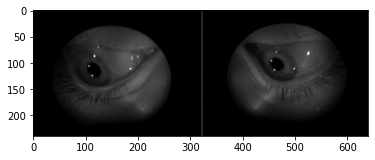

In [10]:
plt.imshow(im)
plt.show()

In [12]:
dt = np.dtype([('timestamp', np.int64), ('x', np.single), ('y', np.single), ('z', np.single)])
print(dt)

[('timestamp', '<i8'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4')]


In [22]:
pos_raw = np.fromfile(path_pos, dtype=dt, offset=256)

In [33]:
pos = np.hstack([pos_raw['x'].reshape(-1, 1), pos_raw['y'].reshape(-1, 1), pos_raw['z'].reshape(-1, 1)]).astype(np.double)
pos.shape

(64000, 3)

In [34]:
pos[0, :]

array([-5.76756954,  3.30764818,  9.98972416])

In [58]:
class EyeTrackingDataset(Dataset):
    """Fove eye tracking dataset."""

    def __init__(self, path_pos, dir_images, transform=None):
        self.path_pos = path_pos
        self.dir_images = dir_images
        self.transform = transform
        self.dt_pos = np.dtype([('timestamp', np.int64), ('x', np.single), ('y', np.single), ('z', np.single)])
        pos_raw = np.fromfile(self.path_pos, dtype=self.dt_pos, offset=256)
        self.pos = np.hstack([pos_raw['x'].reshape(-1, 1), pos_raw['y'].reshape(-1, 1), pos_raw['z'].reshape(-1, 1)]).astype(np.double)

    def __len__(self):
        return self.pos.shape[0]

    def __getitem__(self, idx):
        print(idx)
        if torch.is_tensor(idx):
            idx = idx.tolist()
        path_image = os.path.join(self.dir_images, f'{idx}.png')
        image = color.rgb2gray(io.imread(path_image))
        if self.transform:
            image = self.transform(image)
        return (image, self.pos[idx, :])

In [60]:
dataset = EyeTrackingDataset(path_pos, dir_images)

loader = DataLoader(dataset, batch_size=4)

sample = next(iter(loader))

0
1
2
3


In [56]:
dataset[0]

0


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5.76756954,  3.30764818,  9.98972416]))

In [63]:
print(sample[0].shape, sample[1].shape)

torch.Size([4, 240, 640]) torch.Size([4, 3])
